In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# **CONTENT ::**

The dataset contains the data of about 6000 numerical simulations (finite element models, FEM). It must be pointed out that there is no noise in the data, that is, if we run again the simulations we'd get the same results. There are 9 input parameters and 4 output results.

##Inputs (continuous and positive values):

(1) **load parameters**: ecc, N, gammaG.

(2) **material parameters**: Esoil, Econc.

(3) **geometry parameters**: Dbot, H1, H2, H3.

##Outputs (continuous values):

(1) **stress related results**: Mrt, Mtt, Mrc, Mtc.

#**INSPIRATION ::**
The data comes from deterministic numerical simulations. Under this circumstance, is there any way we can find a model that gives accurate results? Let's say something like **5% error** (Truevalue / Predictedvalue within the range of **[0.95, 1.05]**).



What accuracy can we expect?

In [3]:
fem1 = pd.read_csv('1000randoms.csv')
fem2 = pd.read_csv('40semi-randoms.csv')
fem3 = pd.read_csv('5184doe.csv')

In [5]:
fem1.head()

,Sample,ecc,N,gammaG,Esoil,Econc,Dbot,H1,H2,H3,Mr_t,Mt_t,Mr_c,Mt_c
0,1,0.00000,2484.45731,0.98520,53.35714,33100.78741,22.69187,1.01748,1.06402,1.49867,0.133729,0.086570,0.133729,0.086570
1,2,12.05251,2484.45731,0.98520,53.35714,33100.78741,22.69187,1.01748,1.06402,1.49867,-1.231619,-0.409107,1.580653,0.993389
2,3,17.22569,2484.45731,0.98520,53.35714,33100.78741,22.69187,1.01748,1.06402,1.49867,-1.798073,-0.709641,2.197034,1.298750
3,4,23.86851,2484.45731,0.98520,53.35714,33100.78741,22.69187,1.01748,1.06402,1.49867,-2.518479,-1.121789,2.975495,1.686231
4,5,0.00000,2464.37170,1.03556,93.10015,35409.90671,22.27972,1.13818,1.01188,0.85739,0.101952,0.070906,0.101952,0.070906


In [6]:
fem1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sample  1000 non-null   int64  
 1   ecc     1000 non-null   float64
 2   N       1000 non-null   float64
 3   gammaG  1000 non-null   float64
 4   Esoil   1000 non-null   float64
 5   Econc   1000 non-null   float64
 6   Dbot    1000 non-null   float64
 7   H1      1000 non-null   float64
 8   H2      1000 non-null   float64
 9   H3      1000 non-null   float64
 10  Mr_t    1000 non-null   float64
 11  Mt_t    1000 non-null   float64
 12  Mr_c    1000 non-null   float64
 13  Mt_c    1000 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 109.5 KB


In [7]:
fem1.describe()

,Sample,ecc,N,gammaG,Esoil,Econc,Dbot,H1,H2,H3,Mr_t,Mt_t,Mr_c,Mt_c
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,13.505678,3534.451046,0.996259,77.529151,33430.625405,20.459594,1.208397,1.485011,1.215343,-1.766404,-0.807850,2.485259,1.575196
std,288.819436,8.809854,882.341655,0.055444,24.975897,2042.570603,1.390192,0.232068,0.296533,0.231364,1.314094,0.696360,1.813876,1.026022
min,1.000000,0.000000,2001.620110,0.900260,35.208290,30054.161790,18.008770,0.800450,1.006210,0.807820,-4.978701,-2.536163,0.067049,0.043397
25%,250.750000,7.513590,2726.021640,0.949420,56.180760,31485.932910,19.266290,1.034380,1.211360,1.023330,-2.693054,-1.301825,0.315496,0.645445
50%,500.500000,15.500830,3611.351895,0.998115,77.759420,33454.730445,20.552740,1.211540,1.486085,1.251735,-1.952675,-0.800057,2.509531,1.717396
75%,750.250000,20.251790,4308.607900,1.040720,99.228270,35274.470300,21.647700,1.406920,1.738110,1.413470,-0.404063,-0.045443,3.774859,2.292633
max,1000.000000,25.990080,4987.486220,1.099790,118.551940,36977.723190,22.918060,1.598400,1.994710,1.598340,0.303619,0.241073,7.418611,3.979341


In [8]:
fem2.head()

,Sample,ecc,N,gammaG,Esoil,Econc,Dbot,H1,H2,H3,Mr_t,Mt_t,Mr_c,Mt_c
0,1,0,2300,0.9,35,33000,19.0,1.5,1.2,1.0,0.108773,0.082759,0.108773,0.082759
1,2,10,2300,0.9,35,33000,19.0,1.5,1.2,1.0,-0.935414,-0.265899,1.143375,0.822603
2,3,18,2300,0.9,35,33000,19.0,1.5,1.2,1.0,-1.681867,-0.708710,2.018585,1.262159
3,4,26,2300,0.9,35,33000,19.0,1.5,1.2,1.0,-2.213149,-1.138414,2.947126,1.706759
4,5,0,3800,0.9,50,32000,21.0,1.3,1.1,1.1,0.098256,0.070389,0.098256,0.070389


In [9]:
fem3.head()

,Sample,ecc,N,gammaG,Esoil,Econc,Dbot,H1,H2,H3,Mr_t,Mt_t,Mr_c,Mt_c
0,1,0,2000,0.9,25,30000,17,0.8,1.0,0.8,0.082100,0.055648,0.082100,0.055648
1,2,10,2000,0.9,25,30000,17,0.8,1.0,0.8,-0.597084,-0.233470,1.160648,0.605016
2,3,18,2000,0.9,25,30000,17,0.8,1.0,0.8,-1.094196,-0.566130,1.908188,0.947770
3,4,26,2000,0.9,25,30000,17,0.8,1.0,0.8,-1.416485,-0.865039,2.844706,1.310545
4,5,0,2000,0.9,25,37000,17,0.8,1.0,0.8,0.079570,0.054213,0.079570,0.054213


In [10]:
fem4 = pd.concat([fem2,fem3])

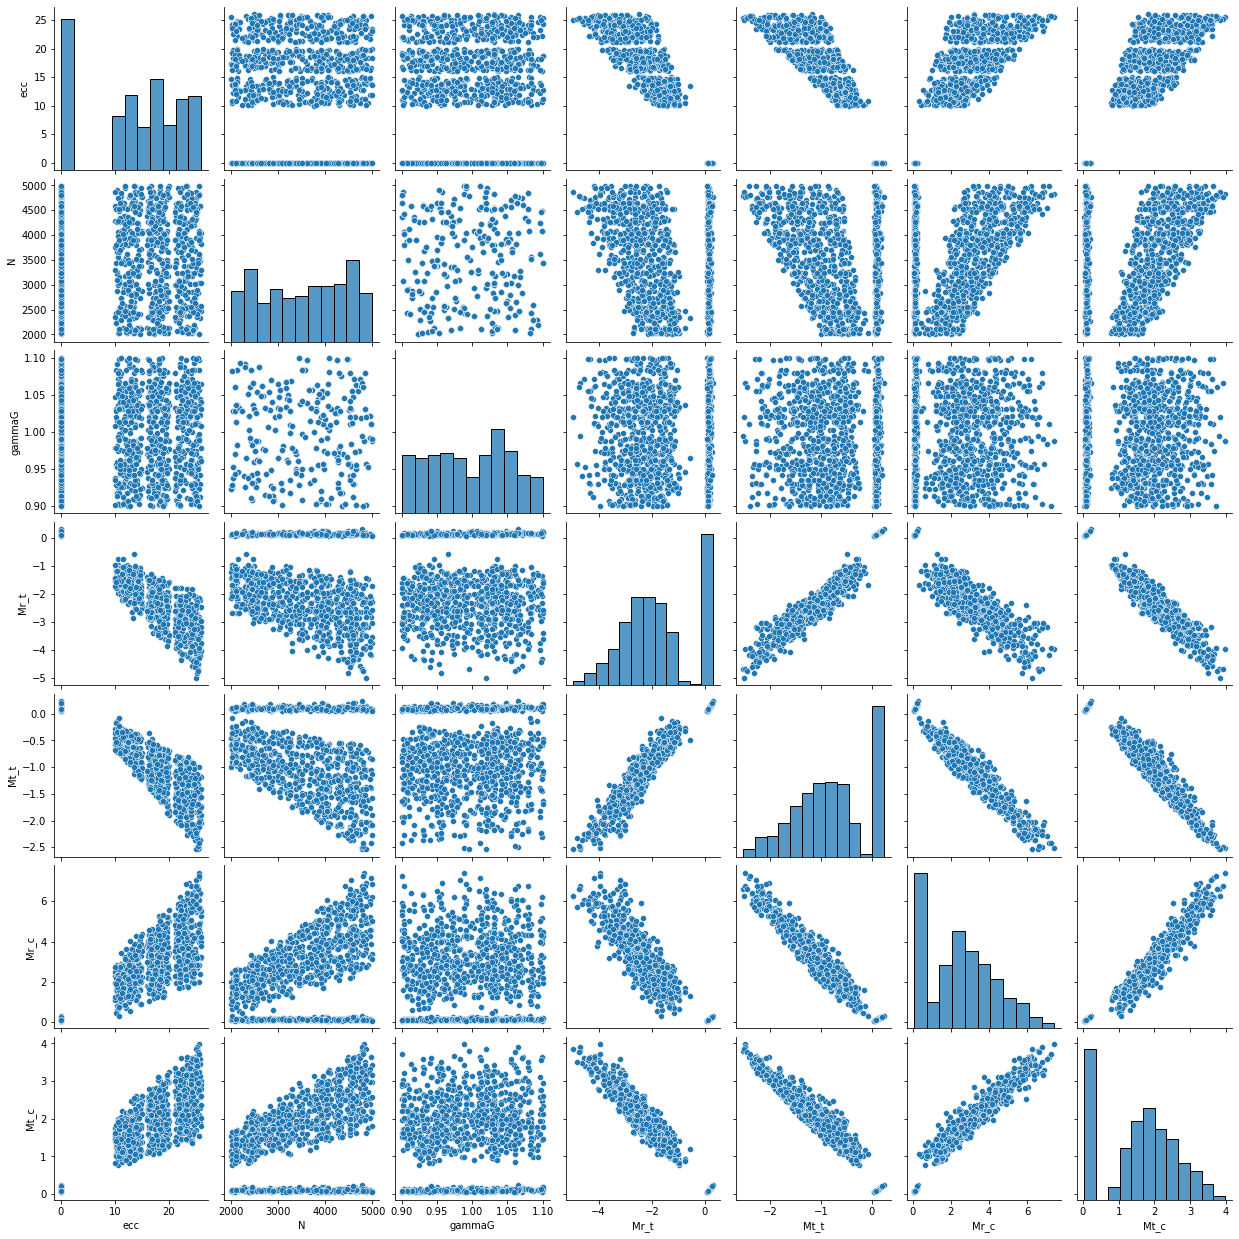

In [11]:
#Load parameters and stress related results::

sns.pairplot(fem1,vars=["ecc","N","gammaG",    "Mr_t","Mt_t","Mr_c","Mt_c"])

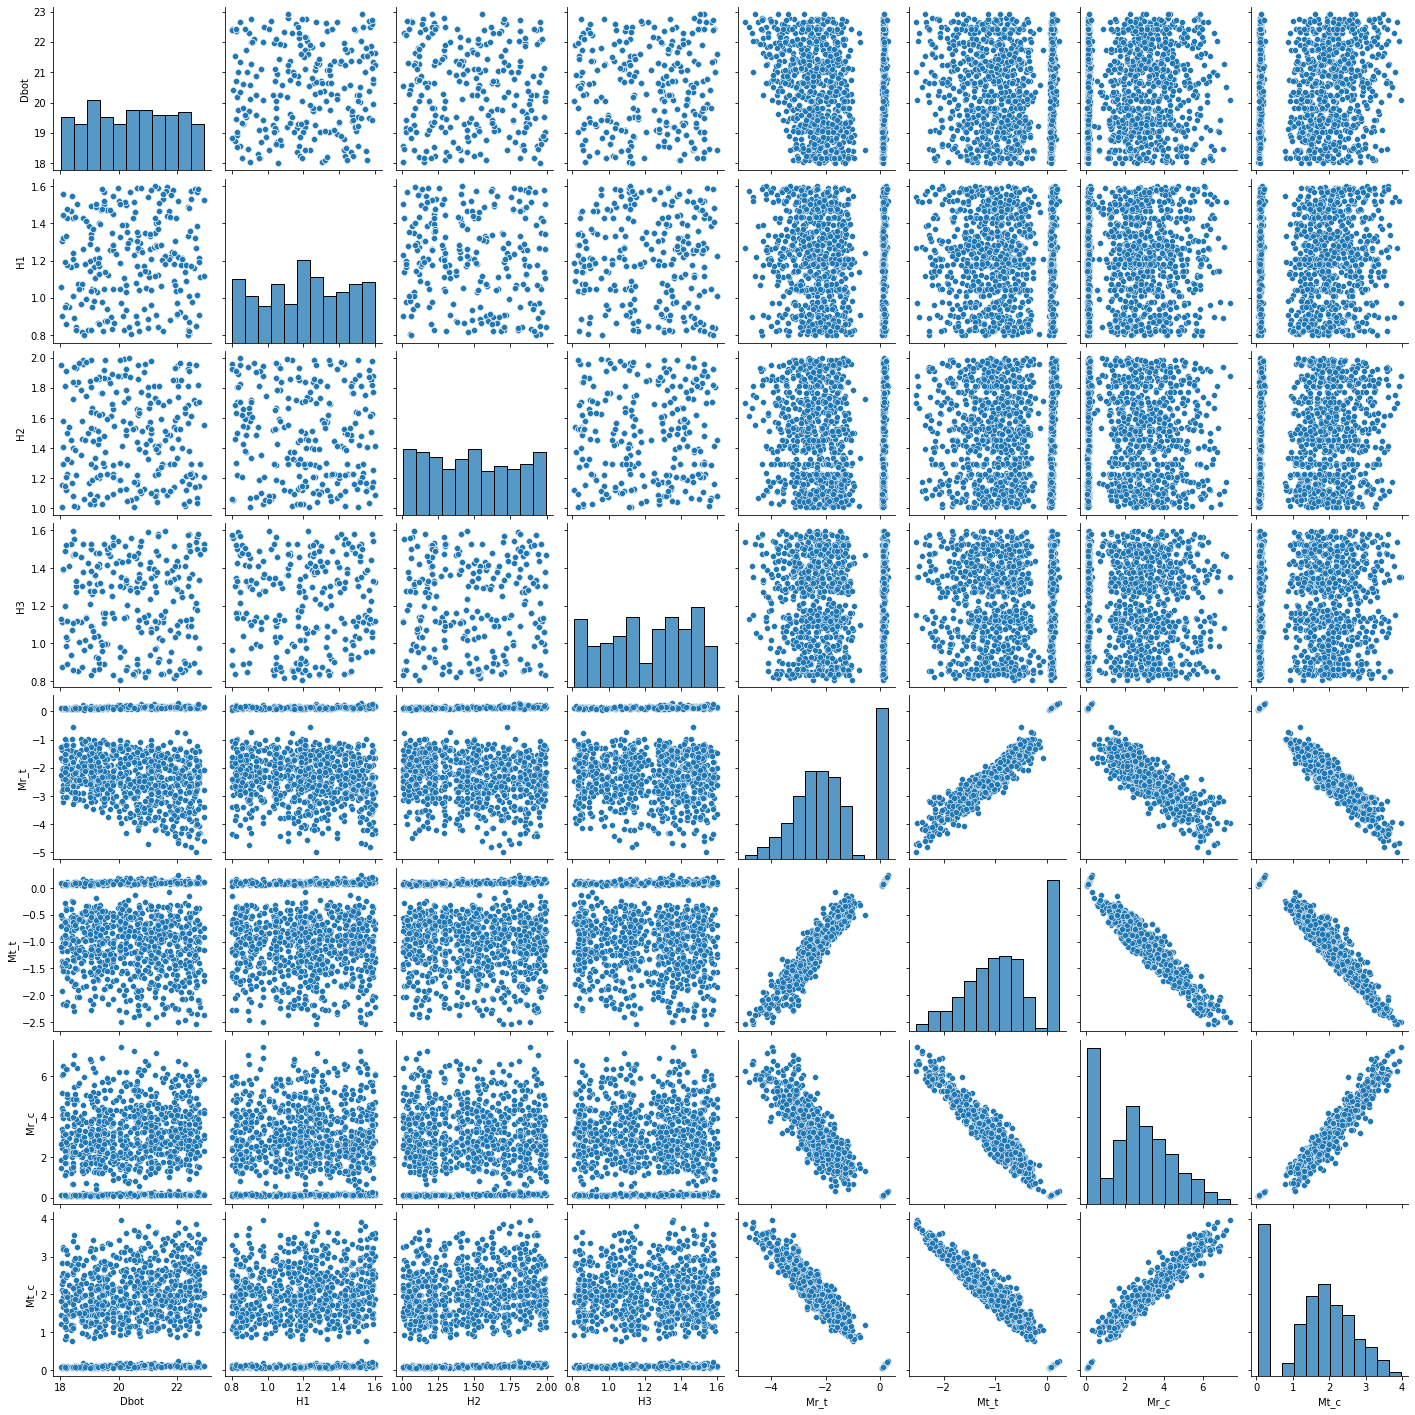

In [12]:
#geometry parameters and stress related results::

sns.pairplot(fem1,vars=["Dbot","H1","H2","H3"   ,"Mr_t","Mt_t","Mr_c","Mt_c"])

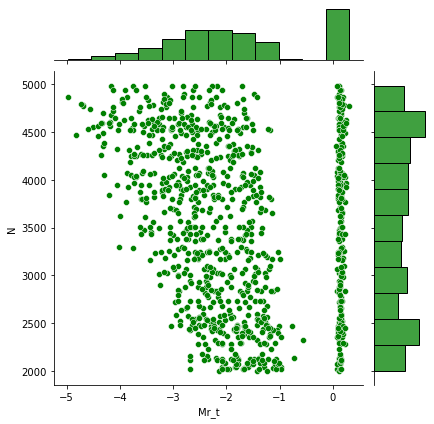

In [13]:
sns.jointplot(x="Mr_t",y="N",data=fem1,color="green")

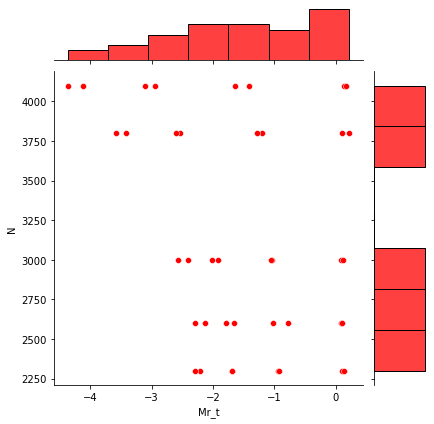

In [14]:
sns.jointplot(x="Mr_t",y="N",data=fem2,color="red")

<AxesSubplot:xlabel='Dbot', ylabel='Count'>

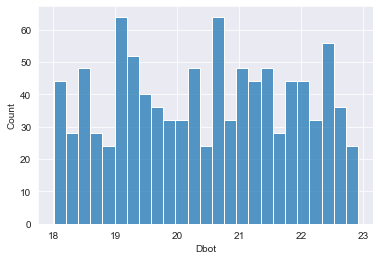

In [15]:
sns.set_style("darkgrid")
sns.histplot(x="Dbot",data=fem1,bins=25)

## MODEL SCALING ::

In [4]:
#Assigning the train and test data ::

X_train = fem1.drop(fem1.columns[[-1,-2,-3,-4]],axis=1)
y_train = fem1[fem1.columns[[-1,-2,-3,-4]]]

In [17]:
#Taking input as x_test ::

X_test = fem4.drop(fem4.columns[[-1,-2,-3,-4]],axis=1)
y_test = fem4[fem4.columns[[-1,-2,-3,-4]]]

In [18]:
#Scaling the train dataset ::

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [19]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## PREDICTION AND EVALUATION ::

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
#To stop the model from overfitting earlystop method is used ::

earlystop = EarlyStopping(monitor = "val_loss",mode='min',patience = 20)

## Developing the model ::

In [88]:
model = Sequential()
model.add(Dense(500,activation = "sigmoid"))
model.add(Dense(300,activation = "sigmoid"))
model.add(Dense(4))
model.compile(optimizer = "rmsprop",loss = "mse")

In [89]:
model.fit(x=X_train,y=y_train,epochs= 200,validation_data=(X_test,y_test),callbacks = [earlystop])

Epoch 1/200
32/32 [==============================] - 1s 19ms/step - loss: 1.8556 - val_loss: 3.0694
Epoch 2/200
32/32 [==============================] - 0s 13ms/step - loss: 1.6970 - val_loss: 2.8498
Epoch 3/200
32/32 [==============================] - 0s 13ms/step - loss: 1.6478 - val_loss: 2.5164
Epoch 4/200
32/32 [==============================] - 0s 13ms/step - loss: 1.5354 - val_loss: 2.3648
Epoch 5/200
32/32 [==============================] - 0s 12ms/step - loss: 1.4793 - val_loss: 3.1281
Epoch 6/200
32/32 [==============================] - 0s 13ms/step - loss: 1.3053 - val_loss: 1.8964
Epoch 7/200
32/32 [==============================] - 0s 13ms/step - loss: 1.1244 - val_loss: 1.6289
Epoch 8/200
32/32 [==============================] - 0s 13ms/step - loss: 0.9261 - val_loss: 1.2453
Epoch 9/200
32/32 [==============================] - 0s 13ms/step - loss: 0.7109 - val_loss: 1.1169
Epoch 10/200
32/32 [==============================] - 0s 13ms/step - loss: 0.5770 - val_loss: 0.9182

In [90]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

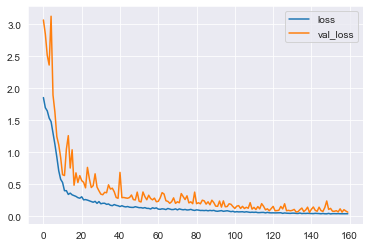

In [91]:
#plotting the loss function of train and test dataset ::

loss.plot()

In [92]:
#Evaluating the RMSE ::

np.sqrt(model.evaluate(X_test,y_test))

164/164 [==============================] - 0s 2ms/step - loss: 0.0629


0.250791934489876

In [93]:
predictions = model.predict(X_test)

164/164 [==============================] - 0s 2ms/step


## PLOTTING RESULTS ::

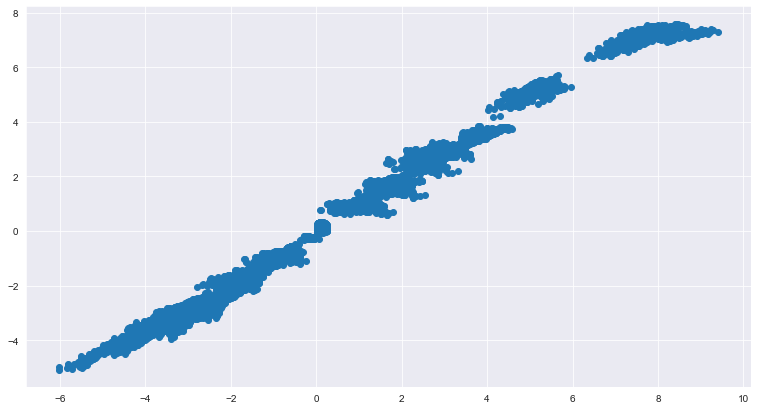

In [114]:
#Plotting the predicted results ::

plt.figure(figsize=(13,7))
plt.scatter(y_test,predictions)

# END